## Predicting Customer Churn in a Telecommunications Company

In [37]:
#Importing some required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn .metrics import roc_auc_score

In [2]:
#Reading the data from csv file and storing it in df
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#displaying top 5 columns using .head() function
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preprocessing

In [4]:
#checking shape of dataset
df.shape

(7043, 21)

In [5]:
#Checking basic information about dataset like datatype, non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#dropping column customerID as it is of no use in model building and prediction
df.drop(columns=['customerID'], inplace=True)

### Changing datatypes 

In [7]:
#Earlier totalcharges was an object dtype, so we will be converting it to a numeric datatype-float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
#buliding a list of all categorical data and converting them to categories inorder to apply .describe function to get basic statistical information

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Convert each column to categorical
for col in cat_cols:
    df[col] = df[col].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [10]:
#Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#as we have very less null value we will drop it 
df.dropna(inplace=True)

In [12]:
#Checking for duplicates
df.duplicated().sum()

22

In [13]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [14]:
#performing basic statistics for numerical data
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [15]:
#performing basic statistics for categorical data
df.describe(include='category')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,5869,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


### Data visualization

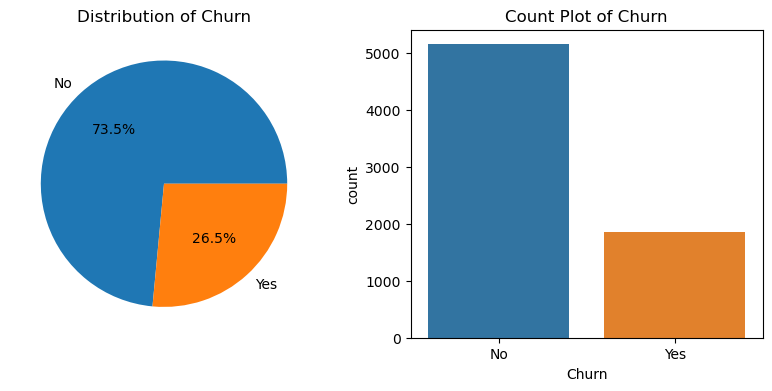

In [16]:
#Making pie charts and count plot to find freq of data and to check class balance/imbalance
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
stats = df['Churn'].value_counts()
axes[0].pie(stats, labels=stats.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of Churn')
sns.countplot(x='Churn', data=df, ax=axes[1])
axes[1].set_title('Count Plot of Churn')
plt.show()

In [17]:
cus_info = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
bill_info = ["Contract", "PaperlessBilling", "PaymentMethod"]

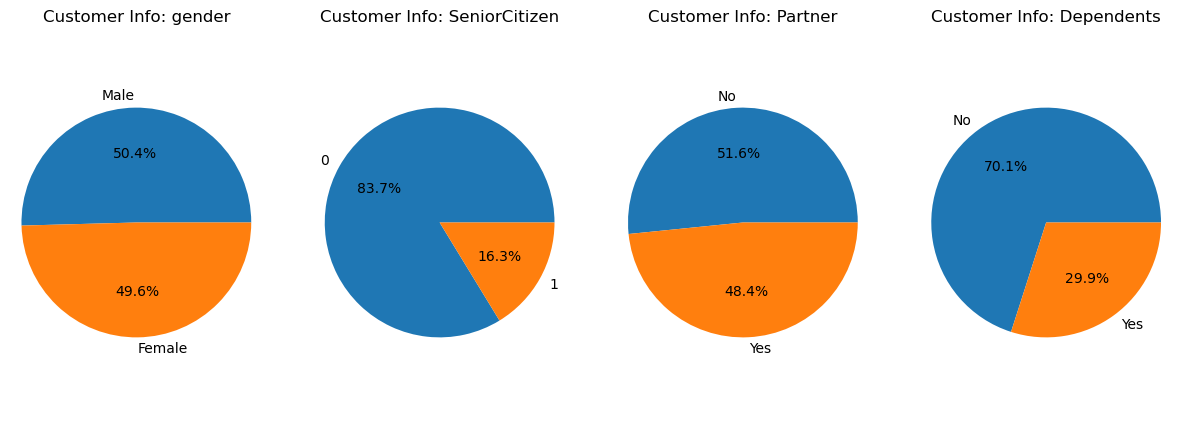

In [18]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(cus_info, 1):
    plt.subplot(1, 4, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Customer Info: {col}')
    plt.axis('equal')  
plt.show()

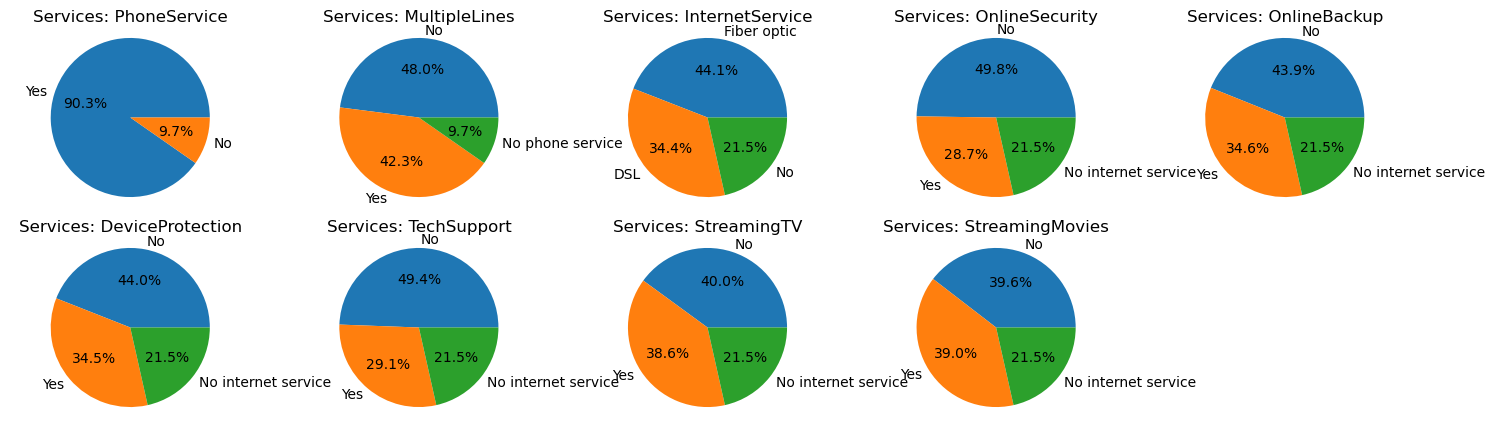

In [19]:
plt.figure(figsize=(18, 5))
for i, col in enumerate(services, 1):
    plt.subplot(2, 5, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Services: {col}')
    plt.axis('equal') 
plt.show()

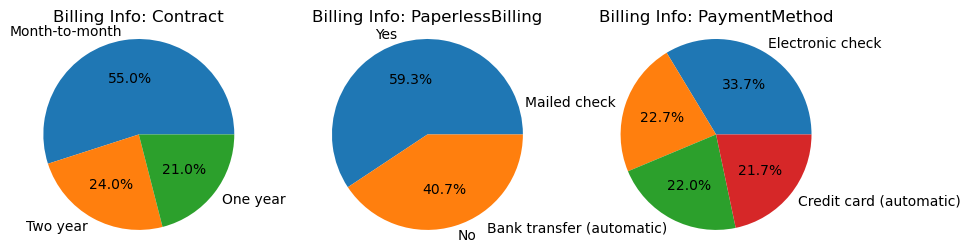

In [20]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(bill_info, 1):
    plt.subplot(2, 5, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Billing Info: {col}')
    plt.axis('equal') 
    

plt.show()

In [21]:
num_cols = list(['tenure', 'MonthlyCharges', 'TotalCharges'])

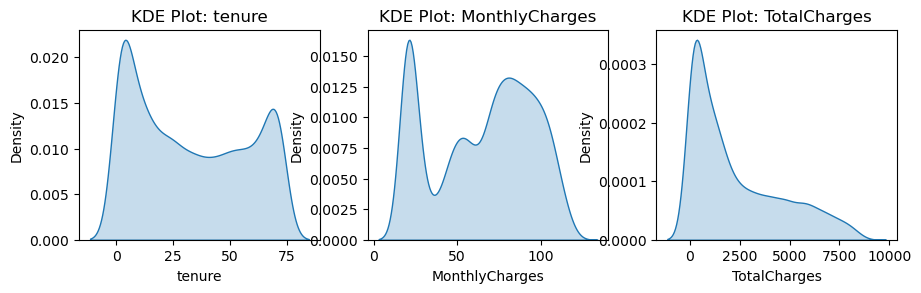

In [22]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 5, i)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'KDE Plot: {col}')
plt.show()

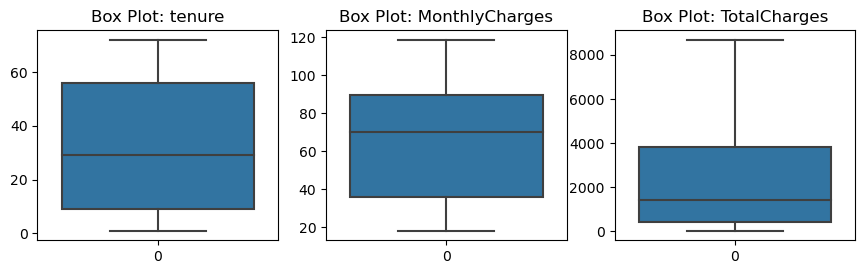

In [23]:
#checking for outliers and the spread of each attribute
plt.figure(figsize=(18, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot: {col}')
plt.show()

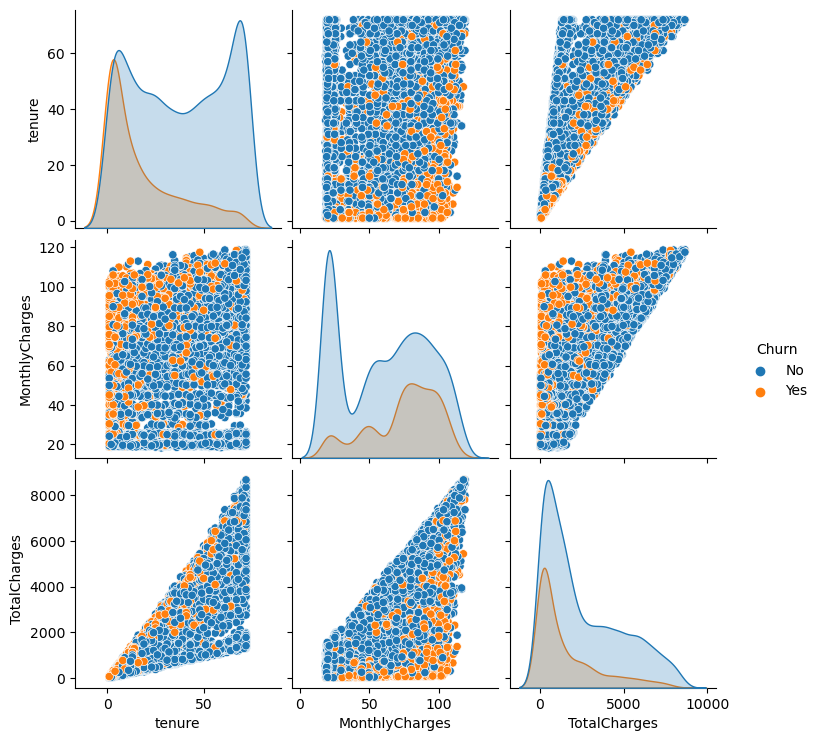

In [24]:
sns.pairplot(df, hue='Churn')
plt.show()

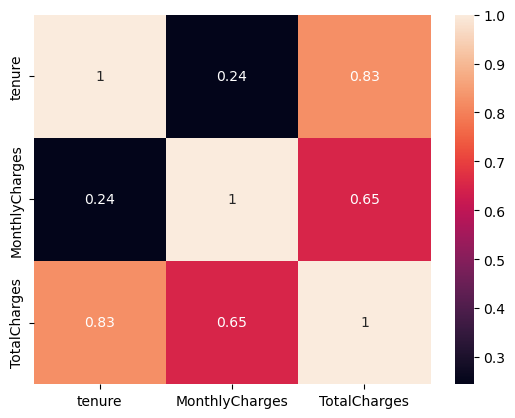

In [25]:
# Checking correlation and plotting a heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [27]:
# Initialize the scaler to make values closer and to make computation faster
scaler = StandardScaler()

# Fit the scaler to the numeric columns and transform them
df[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
#Applying one-hot encoding using .get_dummies()
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns, drop_first=True)

In [29]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,-1.285566,-1.165523,-0.997284,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.060346,-0.264071,-0.176848,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-1.244781,-0.367189,-0.962740,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.508983,-0.751387,-0.198355,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.244781,0.193308,-0.943549,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.347506,0.662329,-0.132289,1,0,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,1.610184,1.274384,2.237896,0,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,-0.877714,-1.173839,-0.857607,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,-1.163210,0.316384,-0.875188,1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [30]:
#checking for datatypes whether there are any categorical value are there or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7010 non-null   float64
 1   MonthlyCharges                         7010 non-null   float64
 2   TotalCharges                           7010 non-null   float64
 3   gender_Male                            7010 non-null   uint8  
 4   SeniorCitizen_1                        7010 non-null   uint8  
 5   Partner_Yes                            7010 non-null   uint8  
 6   Dependents_Yes                         7010 non-null   uint8  
 7   PhoneService_Yes                       7010 non-null   uint8  
 8   MultipleLines_No phone service         7010 non-null   uint8  
 9   MultipleLines_Yes                      7010 non-null   uint8  
 10  InternetService_Fiber optic            7010 non-null   uint8  
 11  Inte

### Model Selection and Training

In [31]:
#creating two variable one containing our dependent variable (churn) and other containing all dependent variables
x = df.drop(columns=['Churn_1'])
y = df['Churn_1'] 

In [32]:
#performing train test split to divide data for training and testing portion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [33]:
#making logistic regression model and fitting it
log_reg = LogisticRegression().fit(x_train, y_train)

#making RF model and fitting it
rf = RandomForestClassifier().fit(x_train, y_train)

#making GB model and fitting it
gb = GradientBoostingClassifier().fit(x_train, y_train)

### Prediction and model evaluation

In [34]:
# Predictions for all the above models
y_pred_log_reg = log_reg.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gb = gb.predict(x_test)

In [36]:
#making a function named as eval_model which takes three args : the actual value, the predicted value and the model name
def eval_model(y_true, y_pred, model_name):
    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {round(accuracy_score(y_true, y_pred),4)}")#printing accuracy
    print(f"Precision: {round(precision_score(y_true, y_pred),4)}")#printing precision
    print(f"Recall: {round(recall_score(y_true, y_pred),4)}")#printing recall value
    print(f"F1-Score: {round(f1_score(y_true, y_pred),4)}")#printing f1-score
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))#printing classification report
    print("\n" + "-"*60 + "\n")

# Evaluate models
eval_model(y_test, y_pred_log_reg, "Logistic Regression")
eval_model(y_test, y_pred_rf, "Random Forest")
eval_model(y_test, y_pred_gb, "Gradient Boosting")

Evaluation metrics for Logistic Regression:
Accuracy: 0.8169
Precision: 0.6726
Recall: 0.5566
F1-Score: 0.6091

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1564
           1       0.67      0.56      0.61       539

    accuracy                           0.82      2103
   macro avg       0.76      0.73      0.74      2103
weighted avg       0.81      0.82      0.81      2103


------------------------------------------------------------

Evaluation metrics for Random Forest:
Accuracy: 0.7979
Precision: 0.6344
Recall: 0.4991
F1-Score: 0.5587

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1564
           1       0.63      0.50      0.56       539

    accuracy                           0.80      2103
   macro avg       0.74      0.70      0.71      2103
weighted avg       0.79      0.80      0.79      2103


------------------

In [44]:
#checking for auc value to check whether our tpr is good enough or not
def auc_roc(y_test,y_pred,model_name):
    auc = np.round(roc_auc_score(y_test, y_pred), 3)
    print(f'Auc for {model_name} is :',auc)
    
auc_roc(y_test, y_pred_log_reg, "Logistic Regression")
auc_roc(y_test, y_pred_rf, "Random Forest")
auc_roc(y_test, y_pred_gb, "Gradient Boosting")

Auc for Logistic Regression is : 0.732
Auc for Random Forest is : 0.7
Auc for Gradient Boosting is : 0.721
